In [1]:
from google.colab import files
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

uploaded = files.upload()
test_data = pd.read_csv('test-Minimum-Error-Rate-Classifier.txt', sep="," ,  
                         header = None, dtype = 'Float64')

Saving test-Minimum-Error-Rate-Classifier.txt to test-Minimum-Error-Rate-Classifier.txt


In [2]:
#PREDEFINED DATA
mean=np.array([[0,0],[2,2]])
variance=np.array([[[0.25,0.3],[0.3,1]],[[0.5,0],[0,0.5]]])
prior=np.array([0.5,0.5])


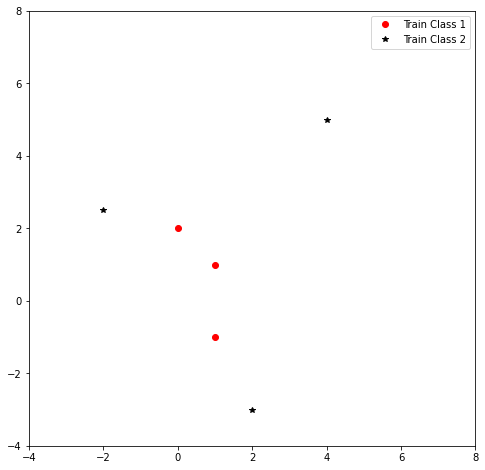

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x1=[]
x2=[]

for i in range(len(test_data)):
  x=np.array([test_data[0][i],test_data[1][i]])
  p_1=-0.5*np.dot(np.dot(np.array([x-mean[0]]),np.linalg.inv(variance[0])),np.transpose([x-mean[0]]))
  p_2=-0.5*np.dot(np.dot(np.array([x-mean[1]]),np.linalg.inv(variance[1])),np.transpose([x-mean[1]]))

  likelihood_1=(1/pow((pow(2*np.pi,2)*np.linalg.det(variance[0])),0.5))*np.exp(p_1)
  likelihood_2=(1/pow((pow(2*np.pi,2)*np.linalg.det(variance[1])),0.5))*np.exp(p_2)
  
  g1=prior[0]*likelihood_1
  g2=prior[1]*likelihood_2

  if g1>g2:
    x1.append(x)
  else:
    x2.append(x)

x1=np.array(x1)
x2=np.array(x2)

plt.figure(figsize=(8,8))
#PLOTTING TRAIN DATA
plt.plot(x1[:,0],x1[:,1],'ro',label='Train Class 1')
plt.plot(x2[:,0],x2[:,1],'k*',label='Train Class 2')
plt.legend()
plt.xlim([-4,8])
plt.ylim([-4,8])  
plt.show()

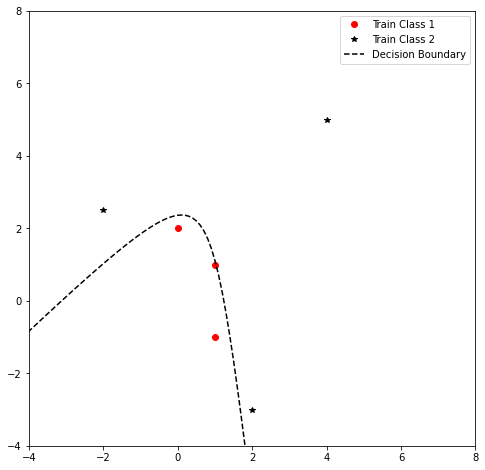

In [5]:
#DRAWING THE DECISION BOUNDARY
w12=np.linalg.inv(variance[0])-np.linalg.inv(variance[1])
w12_t=np.dot(np.linalg.inv(variance[0]),np.transpose([mean[0]]))-np.dot(np.linalg.inv(variance[1]),np.transpose([mean[1]]))
w12_t=w12_t*2
w0=np.dot(np.dot([mean[0]],np.linalg.inv(variance[0])),np.transpose([mean[0]]))-np.dot(np.dot([mean[1]],np.linalg.inv(variance[1])),np.transpose([mean[1]]))-np.log(np.linalg.det(variance[1])/np.linalg.det(variance[0]))+2*np.log(prior[1]/prior[0])


x_vals=[]
y_vals=[]

#SOLVING QUADRATIC EQN FOR DB ay2+by+c=0
for q in [q * 0.1 for q in range(-80, 25)]:
  a=w12[1][1]
  b=w12[1][0]*q+w12[0][1]*q-w12_t[1][0]
  c=w12[0][0]*q*q - w12_t[0][0]*q + w0

  y1=(-b+np.sqrt(b*b-4*a*c))/(2*a)
  x_vals.append(q)
  y_vals.append(y1[0][0])

plt.figure(figsize=(8,8))
#PLOTTING TRAIN DATA
plt.plot(x1[:,0],x1[:,1],'ro',label='Train Class 1')
plt.plot(x2[:,0],x2[:,1],'k*',label='Train Class 2')
plt.plot(x_vals,y_vals,'k--',label='Decision Boundary')

plt.legend()
plt.xlim([-4,8])
plt.ylim([-4,8])  
plt.show()

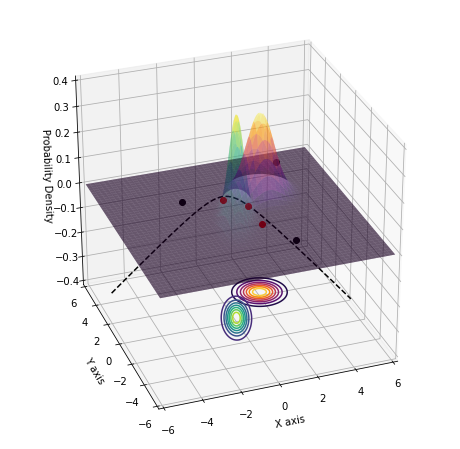

In [6]:
#CALCULATING PROBABILITY DISTRIBUTION FUNCTIONS
x = np.linspace(6,-6,500)
y = np.linspace(6,-6,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y

#CALCULATING PDFS
mean1 = mean[0]
cov1  = variance[0]
rv1 = multivariate_normal(mean1,cov1)

mean2 = mean[1]
cov2  = variance[1]
rv2 = multivariate_normal(mean2,cov2)

fig = plt.figure(figsize=(8,8))

Z1 = rv1.pdf(pos)
Z2 = rv2.pdf(pos)
ax = fig.add_subplot(1,1,1, projection='3d')

#PLOTTING PDF
ax.plot_surface(X, Y, Z1,cmap='viridis',linewidth=0,alpha=0.4)
ax.plot_surface(X, Y, Z2,cmap='inferno',linewidth=0,alpha=0.4)

#PLOTTING DECISION BOUNDARY
ax.plot(x_vals,y_vals,'k--',label='Decision Boundary')

#PLOTTING DATA-POINTS 
ax.plot(x1[:,0],x1[:,1],'ro',label='Train Class 1')
ax.plot(x2[:,0],x2[:,1],'ko',label='Train Class 2')

#PLOTTING CONTOURS
ax.contour(X, Y, Z1, zdir='z', offset=-0.40, cmap='viridis')
ax.contour(X, Y, Z2, zdir='z', offset=-0.40, cmap='inferno')

#SETTING LIMITS
ax.set_zlim(-0.40, 0.40)
ax.set_xlim(6, -6)
ax.set_ylim(6, -6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.view_init(30, 70) 
plt.show()

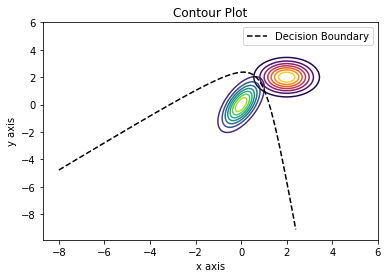

In [7]:
#PLOTTING CONTOURS
xlist = np.linspace(6, -6, 500)
ylist = np.linspace(6, -6, 500)
X, Y = np.meshgrid(xlist, ylist)
Z1 = rv1.pdf(pos)
Z2 = rv2.pdf(pos)
fig,ax=plt.subplots(1,1)
cp1 = ax.contour(X, Y, Z1,cmap='viridis')
cp2 = ax.contour(X, Y, Z2,cmap='inferno')

ax.plot(x_vals,y_vals,'k--',label='Decision Boundary')
ax.legend()
ax.set_title('Contour Plot')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
plt.show()